In [50]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.pipeline import Pipeline


<div style="color:black;font-size:30px;">
Data Cleaning
</div>
<div style="color:#999999;font-size:15px;">
    <ul>
        <li>Get data from source (excel)</li>
        <li>Information about data</li>
        <li>Adjust column names</li>
        <li>Analyze values of columns (minimum, maximum, standard deviation, etc.)</li>
        <li>Treat missing values</li>
    </ul>
</div>


<div style="color:black;font-size:15;">
Get data from source (excel)
</div>

In [2]:
df = pd.read_csv('cs-training.csv',index_col='Unnamed: 0')

<div style="color:black;font-size:15;">
Information about data
</div>

In [3]:
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

<div style="color:black;font-size:15;">
Adjust column names
</div>

In [6]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
df.columns = [col.replace('-','_').lower() for col in df.columns]

In [8]:
df.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30_59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime60_89dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

<div style="color:black;font-size:15;">
Treat missing values
</div>

In [9]:
df.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30_59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60_89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

In [10]:
df.isnull().sum()[df.isnull().sum() != 0]

monthlyincome         29731
numberofdependents     3924
dtype: int64

<AxesSubplot:>

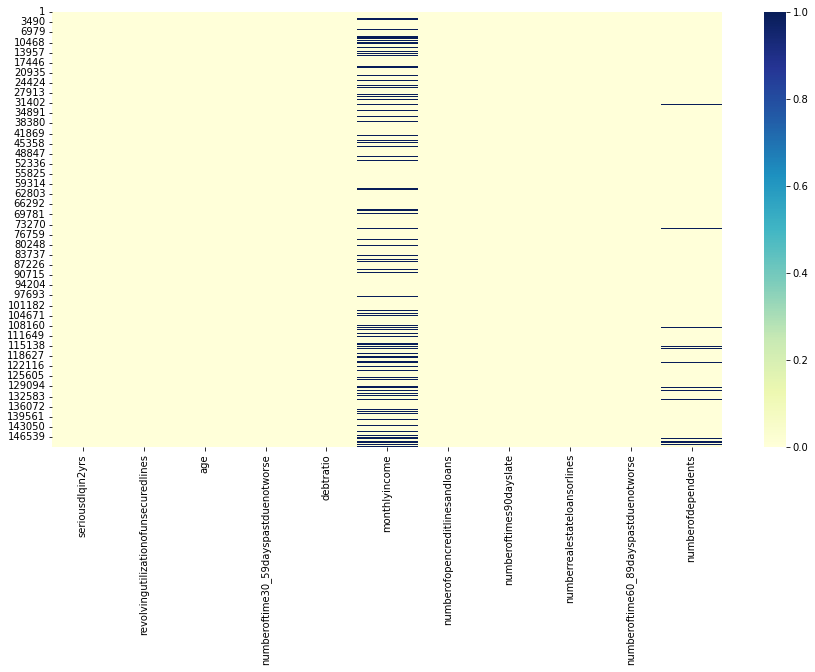

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),vmin=0,vmax=1,cmap='YlGnBu')#

In [12]:
# custom function to observe nulls
def nullrate(col):
    print('missing data count: ',df[col].isnull().sum()) 
    print('column size: ',df[col].size)
    print('rate: ',round(df[col].isnull().sum()/df[col].size,2)) 
    print('unique value size',df[col].unique().size)
    print('dtype',df[col].dtype)
    print('value counts\n',df[col].value_counts())
    print('mean',df[col].mean())
    print('mode',df[col].mode().item())
    print('median',df[col].median())

In [13]:
for i in df.columns:
    nullrate(i)

missing data count:  0
column size:  150000
rate:  0.0
unique value size 2
dtype int64
value counts
 0    139974
1     10026
Name: seriousdlqin2yrs, dtype: int64
mean 0.06684
mode 0
median 0.0
missing data count:  0
column size:  150000
rate:  0.0
unique value size 125728
dtype float64
value counts
 0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.007984        6
            ...  
0.954162        1
0.820080        1
0.176771        1
0.084661        1
0.850283        1
Name: revolvingutilizationofunsecuredlines, Length: 125728, dtype: int64
mean 6.048438054666888
mode 0.0
median 0.154180737
missing data count:  0
column size:  150000
rate:  0.0
unique value size 86
dtype int64
value counts
 49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64
mean 52.295206666666665
mode 49
median 52.0
missing data count:  0
column size:  150000
rate:  0.0
unique v

<div style="color:black;font-size:15;">
Based on information about observations we will use median to fill missing values of both columns
</div>

In [14]:
imputer = SimpleImputer(strategy='median')
df['monthlyincome'] = imputer.fit_transform(df[['monthlyincome']])
df.numberofdependents = imputer.fit_transform(df[['numberofdependents']])

<div style="color:black;font-size:15;">
In age column there can not be 0 value so we will treat these values
</div>

In [15]:
df.age.min()

0

In [16]:
df.age[df.age<18] = df.age.mode().item()

In [17]:
df.age.min()

21

In [18]:
df.isnull().sum().sum()

0

<div style="color:black;font-size:30px;">
EDA
</div>
<div style="color:#999999;font-size:15px;">
    <ul>
        <li>Corollation</li>
        <li>Feature Engineering</li>
        <li>Multicollinearity (VIF)</li>
        <li>drop useless columns</li>
        <li>Visualize and treat Outliers</li>
        <li>Visualize distributions for model selection</li>
    </ul>
</div>


<div style="color:black;font-size:15;">
Corollation
</div>

<AxesSubplot:>

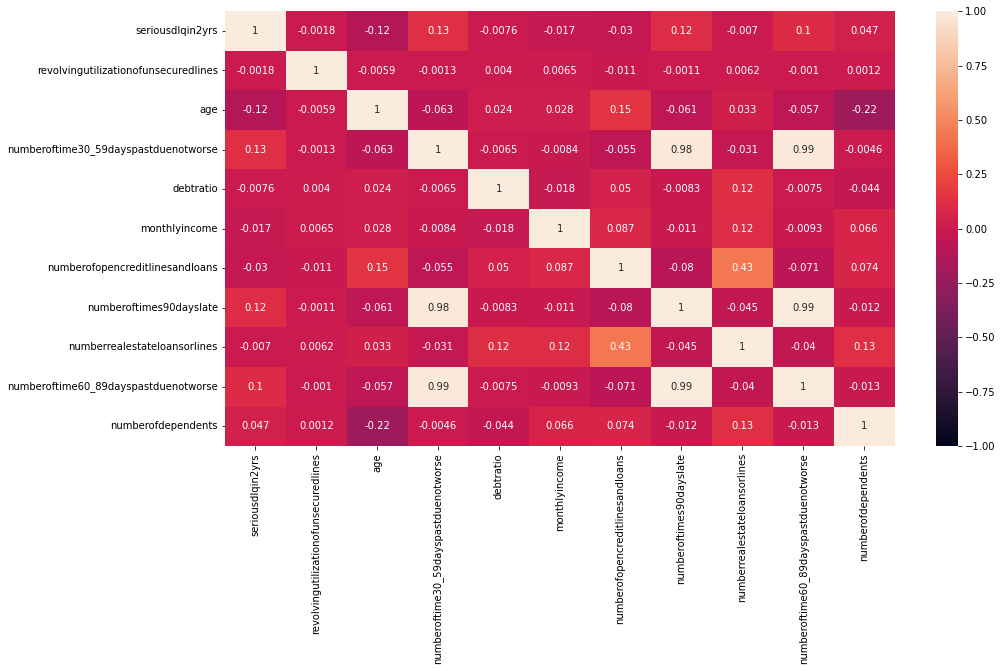

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [20]:
df.corr()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60_89dayspastduenotworse,numberofdependents
seriousdlqin2yrs,1.000000,-0.001802,-0.115396,0.125587,-0.007602,-0.017151,-0.029669,0.117175,-0.007038,0.102261,0.046869
revolvingutilizationofunsecuredlines,-0.001802,1.000000,-0.005899,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.115396,-0.005899,1.000000,-0.062995,0.024185,0.027581,0.147701,-0.061009,0.033171,-0.057163,-0.215677
numberoftime30_59dayspastduenotworse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,-0.007602,0.003961,0.024185,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,-0.017151,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.029669,-0.011281,0.147701,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,0.117175,-0.001061,-0.061009,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,-0.007038,0.006235,0.033171,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime60_89dayspastduenotworse,0.102261,-0.001048,-0.057163,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678


In [21]:
df.corr().unstack()

seriousdlqin2yrs    seriousdlqin2yrs                        1.000000
                    revolvingutilizationofunsecuredlines   -0.001802
                    age                                    -0.115396
                    numberoftime30_59dayspastduenotworse    0.125587
                    debtratio                              -0.007602
                                                              ...   
numberofdependents  numberofopencreditlinesandloans         0.074026
                    numberoftimes90dayslate                -0.011962
                    numberrealestateloansorlines            0.129399
                    numberoftime60_89dayspastduenotworse   -0.012678
                    numberofdependents                      1.000000
Length: 121, dtype: float64

In [22]:
corollations = df.corr().mask(np.triu(np.ones(df.corr().shape)).astype(bool)).stack().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'value'})

In [23]:
corollations.sort_values(by='value',ascending=False)

,feature1,feature2,value
43,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,0.992796
39,numberoftime60_89dayspastduenotworse,numberoftime30_59dayspastduenotworse,0.987005
24,numberoftimes90dayslate,numberoftime30_59dayspastduenotworse,0.983603
34,numberrealestateloansorlines,numberofopencreditlinesandloans,0.433959
17,numberofopencreditlinesandloans,age,0.147701
53,numberofdependents,numberrealestateloansorlines,0.129399
3,numberoftime30_59dayspastduenotworse,seriousdlqin2yrs,0.125587
32,numberrealestateloansorlines,debtratio,0.120046
21,numberoftimes90dayslate,seriousdlqin2yrs,0.117175
33,numberrealestateloansorlines,monthlyincome,0.116273


In [24]:
corollations[corollations.feature2 == 'seriousdlqin2yrs'].sort_values(by='value')

,feature1,feature2,value
1,age,seriousdlqin2yrs,-0.115396
15,numberofopencreditlinesandloans,seriousdlqin2yrs,-0.029669
10,monthlyincome,seriousdlqin2yrs,-0.017151
6,debtratio,seriousdlqin2yrs,-0.007602
28,numberrealestateloansorlines,seriousdlqin2yrs,-0.007038
0,revolvingutilizationofunsecuredlines,seriousdlqin2yrs,-0.001802
45,numberofdependents,seriousdlqin2yrs,0.046869
36,numberoftime60_89dayspastduenotworse,seriousdlqin2yrs,0.102261
21,numberoftimes90dayslate,seriousdlqin2yrs,0.117175
3,numberoftime30_59dayspastduenotworse,seriousdlqin2yrs,0.125587


<div style="color:black;font-size:15;">
Feature Engineering
</div>

In [25]:
corollations[(corollations.feature2 != 'seriousdlqin2yrs') &
             ((corollations.value>0.50) | (corollations.value <-0.50))].sort_values(by='value')

,feature1,feature2,value
24,numberoftimes90dayslate,numberoftime30_59dayspastduenotworse,0.983603
39,numberoftime60_89dayspastduenotworse,numberoftime30_59dayspastduenotworse,0.987005
43,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,0.992796


In [26]:
df[['numberoftimes90dayslate','numberoftime30_59dayspastduenotworse','numberoftime60_89dayspastduenotworse']] \
    [(df.numberoftime30_59dayspastduenotworse == 0) & ((df.numberoftimes90dayslate!=0) | 
                                                      (df.numberoftime60_89dayspastduenotworse!=0) ) ]

,numberoftimes90dayslate,numberoftime30_59dayspastduenotworse,numberoftime60_89dayspastduenotworse
50,1,0,0
51,0,0,1
69,1,0,0
73,1,0,0
88,0,0,1
...,...,...,...
149955,2,0,0
149963,3,0,0
149968,0,0,1
149969,1,0,0


In [27]:
df['numberoflate'] =    df['numberoftimes90dayslate'] + \
                        df['numberoftime30_59dayspastduenotworse'] + \
                        df['numberoftime60_89dayspastduenotworse']

In [28]:
df['islate'] = df[['numberoftimes90dayslate','numberoftime30_59dayspastduenotworse','numberoftime60_89dayspastduenotworse']].\
apply(lambda x: 1 if x[0] + x[1] + x[2]>0 else 0,axis=1)

In [29]:
a  = df.corr().mask(np.triu(np.ones(df.corr().shape)).astype(bool)).stack().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'value'})
a[a.feature2=='seriousdlqin2yrs'].sort_values(by='value',ascending=False)

,feature1,feature2,value
66,islate,seriousdlqin2yrs,0.314407
3,numberoftime30_59dayspastduenotworse,seriousdlqin2yrs,0.125587
21,numberoftimes90dayslate,seriousdlqin2yrs,0.117175
55,numberoflate,seriousdlqin2yrs,0.115513
36,numberoftime60_89dayspastduenotworse,seriousdlqin2yrs,0.102261
45,numberofdependents,seriousdlqin2yrs,0.046869
0,revolvingutilizationofunsecuredlines,seriousdlqin2yrs,-0.001802
28,numberrealestateloansorlines,seriousdlqin2yrs,-0.007038
6,debtratio,seriousdlqin2yrs,-0.007602
10,monthlyincome,seriousdlqin2yrs,-0.017151


In [30]:
a[a.value > 0.5].sort_values(by='value',ascending=False)

,feature1,feature2,value
64,numberoflate,numberoftime60_89dayspastduenotworse,0.997316
62,numberoflate,numberoftimes90dayslate,0.996180
58,numberoflate,numberoftime30_59dayspastduenotworse,0.994281
43,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,0.992796
39,numberoftime60_89dayspastduenotworse,numberoftime30_59dayspastduenotworse,0.987005
24,numberoftimes90dayslate,numberoftime30_59dayspastduenotworse,0.983603


In [31]:
df.drop(['numberoflate','numberoftime60_89dayspastduenotworse','numberoftimes90dayslate'],axis=1,inplace=True)

In [32]:
corollations = df.corr().mask(np.triu(np.ones(df.corr().shape)).astype(bool)).stack().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'value'})

In [33]:
corollations.sort_values(by='value',ascending=False)[corollations.feature2 == 'seriousdlqin2yrs']

,feature1,feature2,value
36,islate,seriousdlqin2yrs,0.314407
3,numberoftime30_59dayspastduenotworse,seriousdlqin2yrs,0.125587
28,numberofdependents,seriousdlqin2yrs,0.046869
0,revolvingutilizationofunsecuredlines,seriousdlqin2yrs,-0.001802
21,numberrealestateloansorlines,seriousdlqin2yrs,-0.007038
6,debtratio,seriousdlqin2yrs,-0.007602
10,monthlyincome,seriousdlqin2yrs,-0.017151
15,numberofopencreditlinesandloans,seriousdlqin2yrs,-0.029669
1,age,seriousdlqin2yrs,-0.115396


In [34]:
corollations[(corollations.value >0.1) | (corollations.value<-0.1)]

,feature1,feature2,value
1,age,seriousdlqin2yrs,-0.115396
3,numberoftime30_59dayspastduenotworse,seriousdlqin2yrs,0.125587
17,numberofopencreditlinesandloans,age,0.147701
25,numberrealestateloansorlines,debtratio,0.120046
26,numberrealestateloansorlines,monthlyincome,0.116273
27,numberrealestateloansorlines,numberofopencreditlinesandloans,0.433959
30,numberofdependents,age,-0.215677
35,numberofdependents,numberrealestateloansorlines,0.129399
36,islate,seriousdlqin2yrs,0.314407
38,islate,age,-0.126925


<div style="color:black;font-size:15;">
Multicollinearity
</div>

In [35]:
x = df.drop('seriousdlqin2yrs',axis=1)
vif = pd.DataFrame()
vif['features'] = x.columns
vif['values']   = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]


In [36]:
vif

,features,values
0,revolvingutilizationofunsecuredlines,1.000778
1,age,3.680903
2,numberoftime30_59dayspastduenotworse,1.053824
3,debtratio,1.049567
4,monthlyincome,1.269623
5,numberofopencreditlinesandloans,4.530323
6,numberrealestateloansorlines,2.303885
7,numberofdependents,1.418385
8,islate,1.279134


<div style="color:black;font-size:15;">
VIF values are less than 5 and there is no strong multy corollation
</div>

<div style="color:black;font-size:15;">
Outliers
</div>

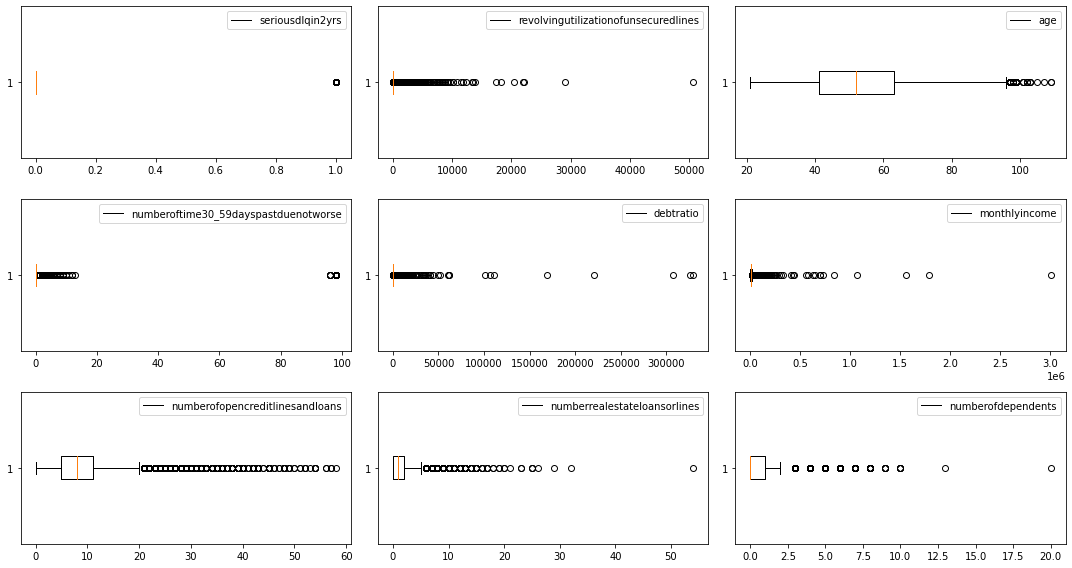

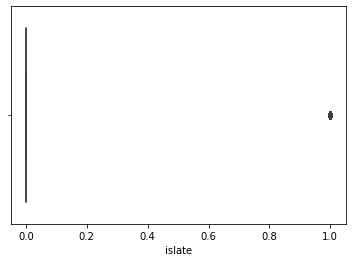

In [37]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(3, 3, figsize=(15, 8))

# Iterate over the subplots and set properties
for i, ax in enumerate(axs.flat):
    # Set different properties for ax[0]
    ax.boxplot(df[df.columns[i]],vert=False)
    ax.legend([df.columns[i]])
    
# fig, axs = plt.subplots(1, 2, figsize=(12, 3))
# for i, ax in enumerate(axs.flat):
#     ax.boxplot(df[df.columns[i+9]],vert=False)
#     ax.legend([df.columns[i]])

    

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

sns.boxplot(df[df.columns[-1]])

plt.show()


In [38]:
for col in df.columns:
    print(col,'------------------------------------------')
    print(df[col].value_counts())

seriousdlqin2yrs ------------------------------------------
0    139974
1     10026
Name: seriousdlqin2yrs, dtype: int64
revolvingutilizationofunsecuredlines ------------------------------------------
0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.007984        6
            ...  
0.954162        1
0.820080        1
0.176771        1
0.084661        1
0.850283        1
Name: revolvingutilizationofunsecuredlines, Length: 125728, dtype: int64
age ------------------------------------------
49     3838
48     3806
50     3753
63     3719
47     3719
       ... 
103       3
102       3
109       2
107       1
105       1
Name: age, Length: 85, dtype: int64
numberoftime30_59dayspastduenotworse ------------------------------------------
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: numberoftime30_59da

In [39]:
outlier_cols = df.columns[(df.columns != 'seriousdlqin2yrs') & (df.columns != 'islate') 
           & (df.columns != 'numberoftime30_59dayspastduenotworse')]

In [40]:
outlier_cols.size

7

In [41]:
def outlier_treatment(col):
    iqr3 = df[col].quantile(0.75)
    iqr1 = df[col].quantile(0.25)
    iqr = iqr3-iqr1
    lower = iqr1 - 1.5*iqr
    higher = iqr3 + 1.5*iqr
    df[col] = np.where(df[col]>higher,higher,(np.where(df[col]<lower,lower,df[col])))

In [42]:
for col in outlier_cols:
    outlier_treatment(col)

[]

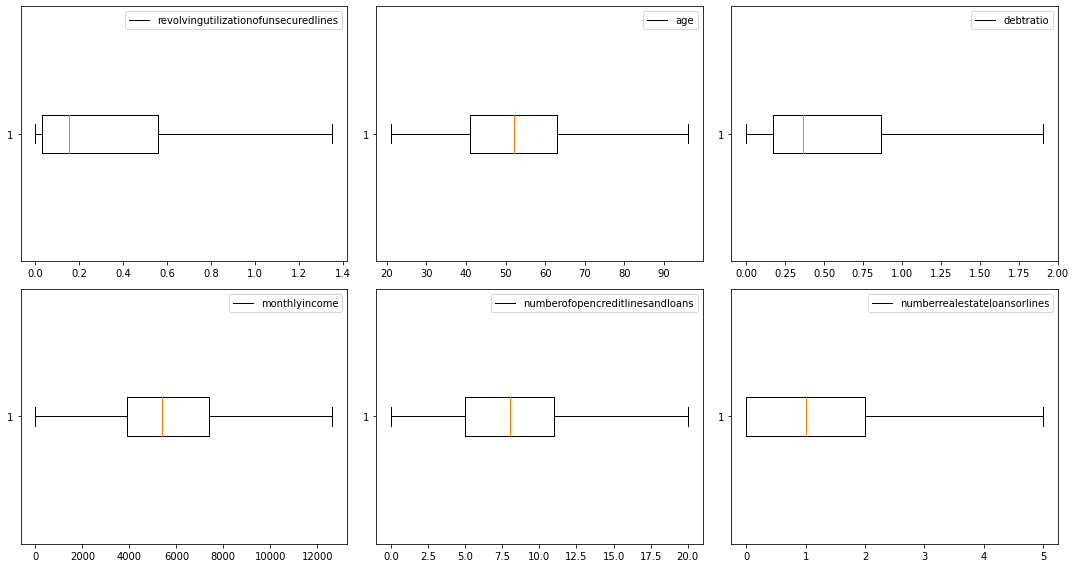

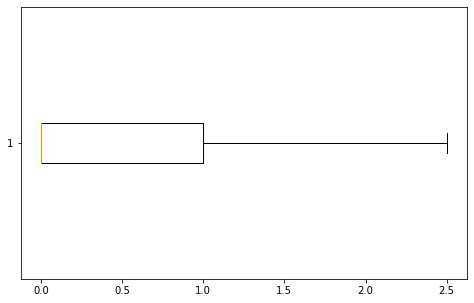

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iterate over the subplots and set properties
for i, ax in enumerate(axs.flat):
    # Set different properties for ax[0]
    ax.boxplot(df[outlier_cols[i]],vert=False)
    ax.legend([outlier_cols[i]])
    

    

# Adjust the spacing between subplots
plt.tight_layout()



fig = plt.figure(figsize=(8,5))
plt.boxplot(df[outlier_cols[-1]],vert=False)
plt.plot()

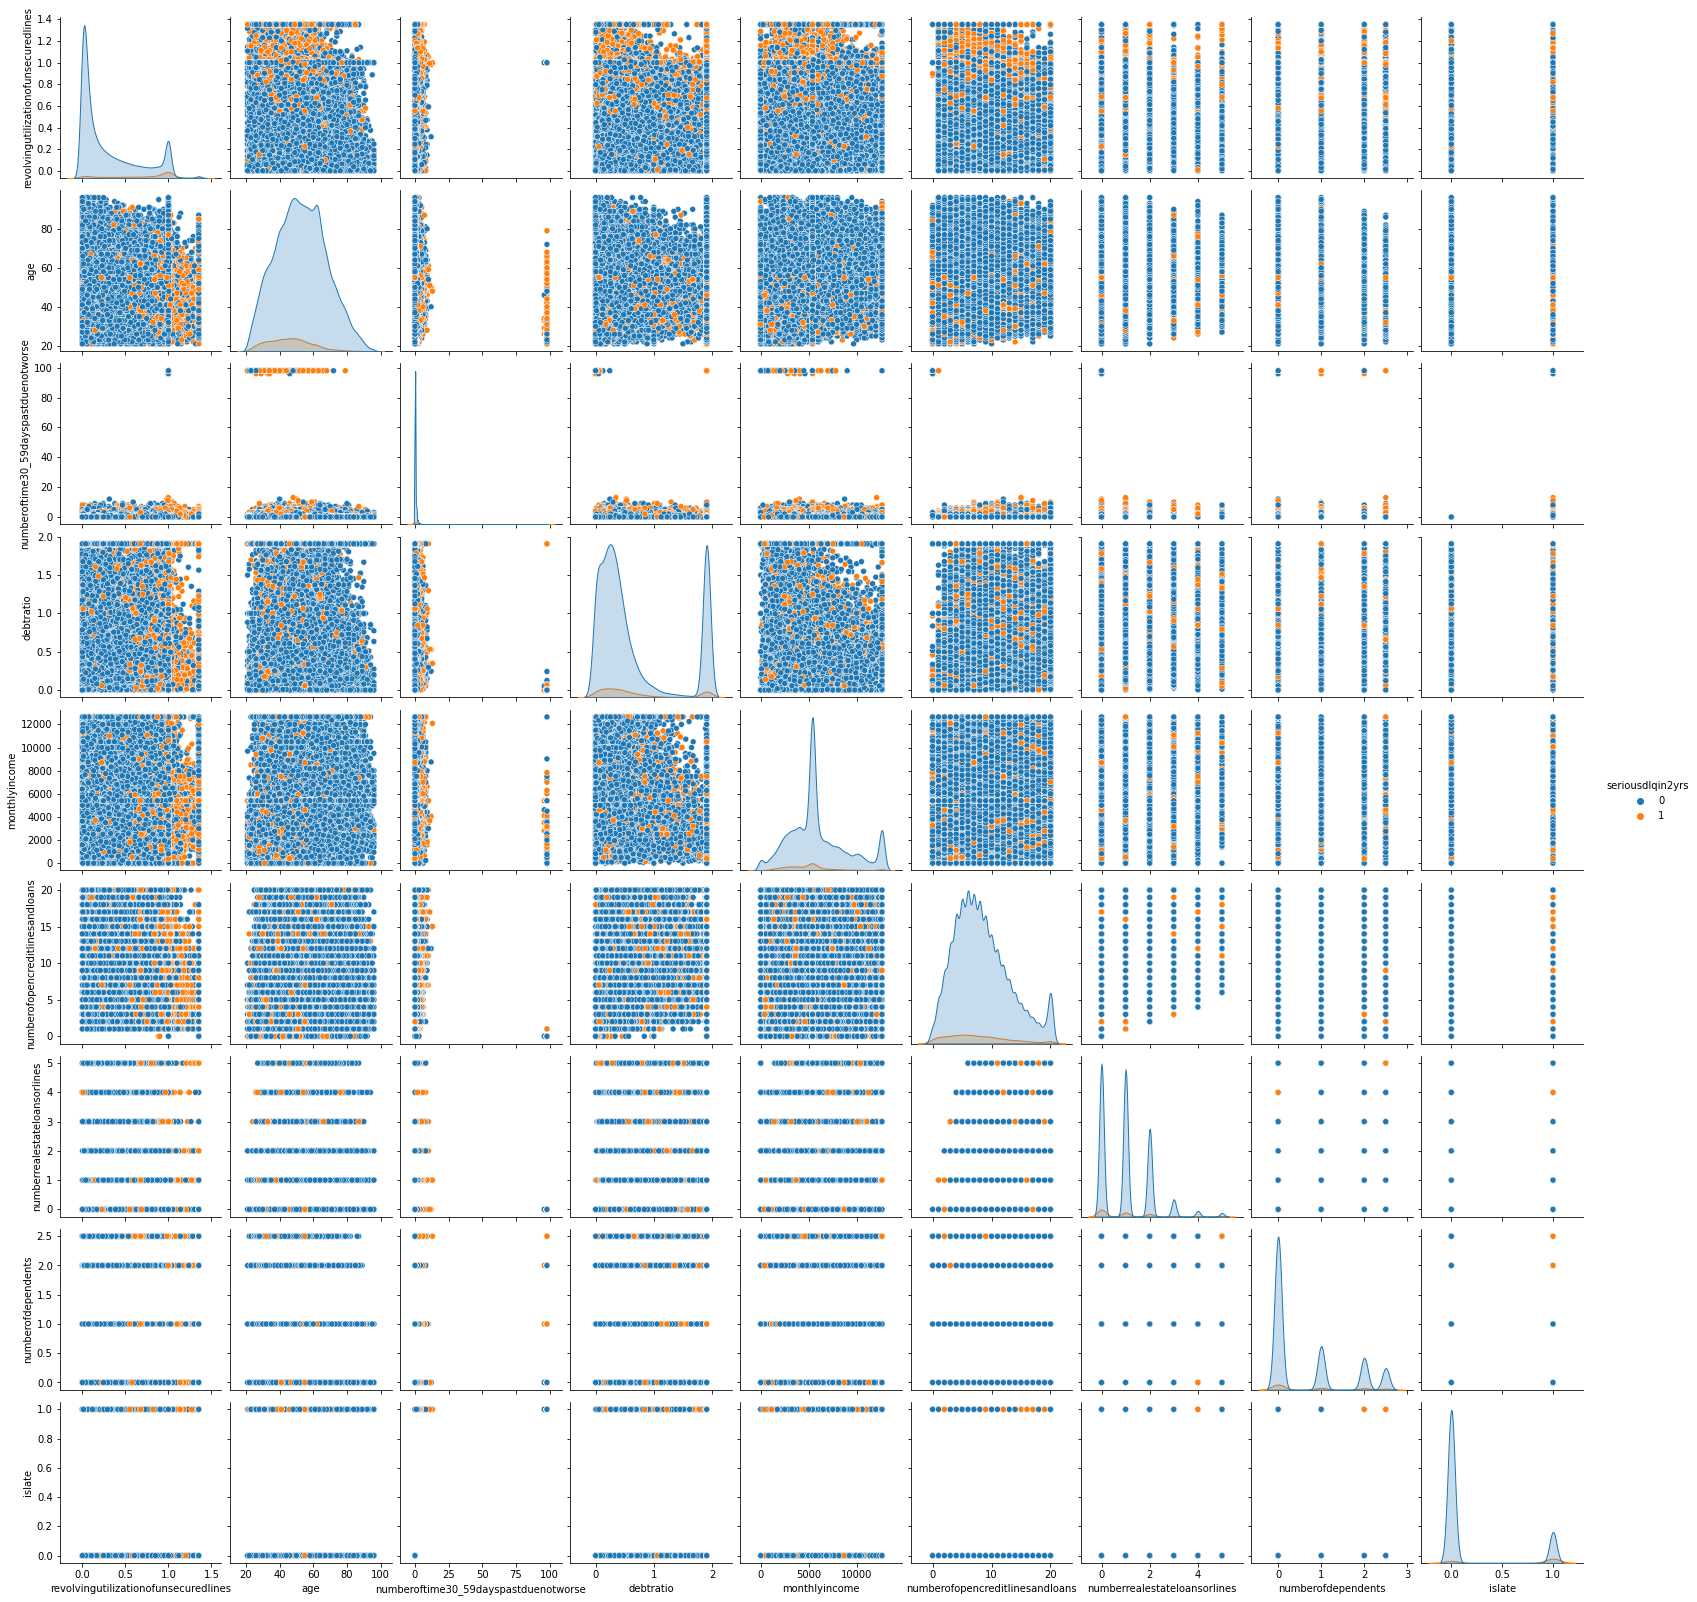

In [44]:
sns.pairplot(df,hue='seriousdlqin2yrs')

# Building Pipeline

In [45]:
df = pd.read_csv('cs-training.csv',index_col='Unnamed: 0')

In [46]:
imputer = SimpleImputer(strategy='median')

In [47]:
# we have changed it a little bit to add pipe (now it takes column and returns column)
def outlier_treatment(col):
    iqr3 = col.quantile(0.75)
    iqr1 = col.quantile(0.25)
    iqr = iqr3-iqr1
    lower = iqr1 - 1.5*iqr
    higher = iqr3 + 1.5*iqr
    return np.where(col>higher,higher,(np.where(col<lower,lower,col)))

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class change_names(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        X.columns = [col.replace('-','_').lower() for col in X.columns]
        return X
    
class median_imputer(BaseEstimator,TransformerMixin):
    
    def fit(self, X,y=None):
        return self
    
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='median')
        X['monthlyincome'] = imputer.fit_transform(X[['monthlyincome']])
        X.numberofdependents = imputer.fit_transform(X[['numberofdependents']])
        return X
    
    
class age_treatment(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X.age[X.age<=18] = X.age.mode().item()
        return X
        
        
        
class FutureEngineering(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        a = X.copy()
        a['islate'] = X[['numberoftimes90dayslate','numberoftime30_59dayspastduenotworse',\
                   'numberoftime60_89dayspastduenotworse']].\
        apply(lambda x: 1 if x[0] + x[1] + x[2]>0 else 0,axis=1)
        a.drop(['numberoftime60_89dayspastduenotworse','numberoftimes90dayslate'],axis=1,inplace=True)
        return a
    
class outlier_replacement(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        outlier_cols = X.columns[(X.columns != 'seriousdlqin2yrs') & (X.columns != 'islate') & (X.columns != 'numberoftime30_59dayspastduenotworse')]
        
        for col in outlier_cols:
            X[col] = outlier_treatment(X[col])
        return X
class convert_dtype(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for i in [col for col in X.columns if col[:6]=='number' or col == 'age']:
            X[i] = X[i].astype(int)
        return X
            

In [51]:
pipe = Pipeline([
    ('change_name',change_names()),
    ('imputer',median_imputer()),
    ('age',age_treatment()),
    ('future_engineer',FutureEngineering()),
    ('outlier_replacement',outlier_replacement()),
    ('convertion_type',convert_dtype())
])

In [52]:
df = pipe.fit_transform(df)

In [53]:
outlier_cols = df.columns[(df.columns != 'seriousdlqin2yrs') & (df.columns != 'islate')& (df.columns != 'numberoftime30_59dayspastduenotworse')]

[]

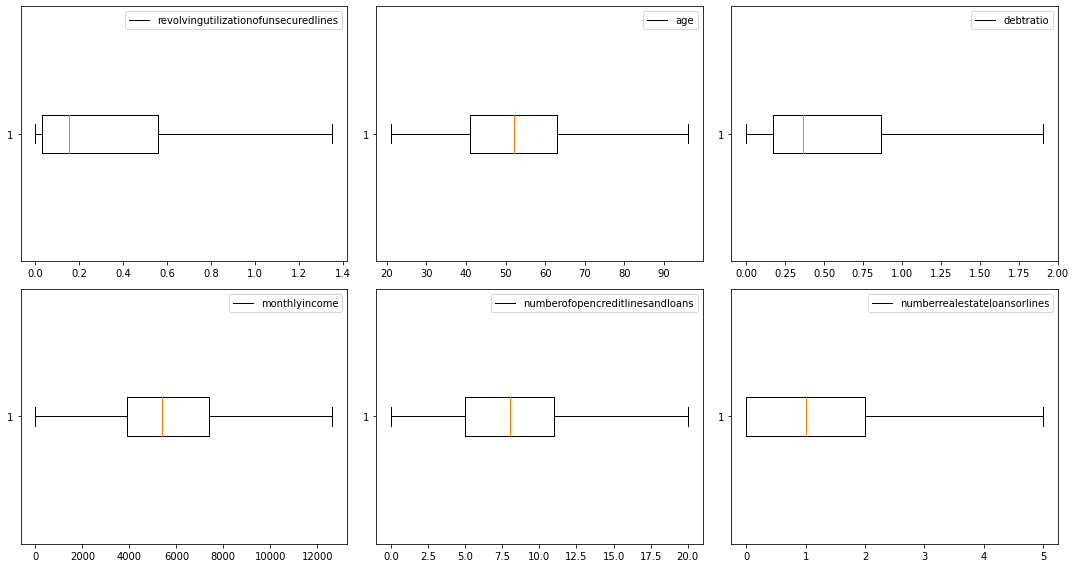

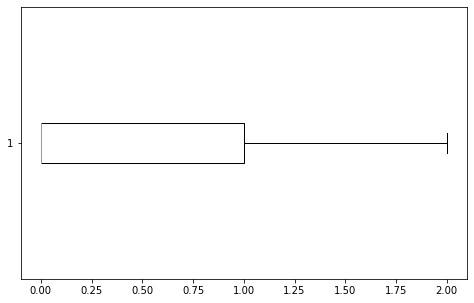

In [54]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Iterate over the subplots and set properties
for i, ax in enumerate(axs.flat):
    # Set different properties for ax[0]
    ax.boxplot(df[outlier_cols[i]],vert=False)
    ax.legend([outlier_cols[i]])
    

    

# Adjust the spacing between subplots
plt.tight_layout()



fig = plt.figure(figsize=(8,5))
plt.boxplot(df[outlier_cols[-1]],vert=False)
plt.plot()

In [55]:
df.head(1)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents,islate
1,1,0.766127,45,2,0.802982,9120.0,13,5,2,1


In [56]:
df.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime30_59dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberrealestateloansorlines',
       'numberofdependents', 'islate'],
      dtype='object')

In [57]:
df.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30_59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberrealestateloansorlines            0
numberofdependents                      0
islate                                  0
dtype: int64

In [58]:
df.age.min()

21

# Model

In [61]:
X = df.drop("seriousdlqin2yrs",axis=1)
y = df.seriousdlqin2yrs

In [62]:
undersampler = RandomUnderSampler(random_state=42)

In [63]:
X, y = undersampler.fit_resample(X, y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.20, 
                                                    random_state=0,stratify=y)


In [65]:
model =  xgb.XGBClassifier()

In [66]:
y_train.value_counts(),y_test.value_counts()

(1    8021
 0    8020
 Name: seriousdlqin2yrs, dtype: int64,
 0    2006
 1    2005
 Name: seriousdlqin2yrs, dtype: int64)

In [67]:
X

,revolvingutilizationofunsecuredlines,age,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents,islate
0,0.082504,47,0,0.252994,8600.0,7,1,2,0
1,0.050834,41,0,0.007679,8333.0,2,0,0,0
2,0.079565,80,0,0.024163,6000.0,8,0,1,0
3,0.202477,48,0,0.235627,9200.0,10,1,0,0
4,0.923077,24,0,0.010796,2500.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
20047,1.000000,46,0,1.908024,401.0,3,0,2,1
20048,1.135552,41,2,0.845887,7500.0,12,4,0,1
20049,0.920107,31,1,0.176732,1125.0,4,0,0,1
20050,0.983825,55,0,0.064116,4600.0,2,0,2,1


In [68]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
base_estimator = xgb.XGBClassifier(**best_params)
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10)
bagging_model.fit(X_train,y_train)
predicted = bagging_model.predict(X_test)

In [69]:
bagging_model.score(X_train,y_train),bagging_model.score(X_test,y_test)

(0.8125428589240072, 0.7773622538020444)

In [70]:
confusion_matrix(y_test,predicted)

array([[1547,  459],
       [ 434, 1571]], dtype=int64)

In [71]:
true,false = 0,0
for i in range(y_test.size):
    if(y_test.iloc[i] == 1 and  y_test.iloc[i] == predicted[i]):
        true+=1
    elif(y_test.iloc[i] == 1 and  y_test.iloc[i] != predicted[i]):
        false+=1
true,false       

(1571, 434)

In [72]:
true/(true+false)

0.7835411471321696

In [73]:
true,false = 0,0
for i in range(y_test.size):
    if(y_test.iloc[i] == 0 and  y_test.iloc[i] == predicted[i]):
        true+=1
    elif(y_test.iloc[i] == 0 and  y_test.iloc[i] != predicted[i]):
        false+=1
true,false  

(1547, 459)

In [74]:
true/(true+false)

0.7711864406779662

In [75]:

y_pred_prob = bagging_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)

AUC: 0.8536613351964057


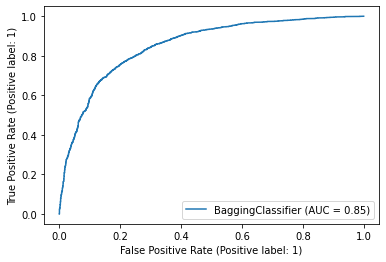

In [76]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(bagging_model,X_test,y_test)
plt.show()

In [77]:
y_test.iloc[0]

0

In [78]:
predicted[0]

0

In [79]:
X_test.iloc[0]

revolvingutilizationofunsecuredlines       0.20939
age                                       37.00000
numberoftime30_59dayspastduenotworse       0.00000
debtratio                                  1.01033
monthlyincome                           3000.00000
numberofopencreditlinesandloans            8.00000
numberrealestateloansorlines               1.00000
numberofdependents                         0.00000
islate                                     0.00000
Name: 6265, dtype: float64

In [80]:
X

,revolvingutilizationofunsecuredlines,age,numberoftime30_59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberrealestateloansorlines,numberofdependents,islate
0,0.082504,47,0,0.252994,8600.0,7,1,2,0
1,0.050834,41,0,0.007679,8333.0,2,0,0,0
2,0.079565,80,0,0.024163,6000.0,8,0,1,0
3,0.202477,48,0,0.235627,9200.0,10,1,0,0
4,0.923077,24,0,0.010796,2500.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
20047,1.000000,46,0,1.908024,401.0,3,0,2,1
20048,1.135552,41,2,0.845887,7500.0,12,4,0,1
20049,0.920107,31,1,0.176732,1125.0,4,0,0,1
20050,0.983825,55,0,0.064116,4600.0,2,0,2,1


In [81]:
with open('model.pkl', 'wb') as file:
    pickle.dump(bagging_model, file)

In [82]:
X_test.iloc[105]

revolvingutilizationofunsecuredlines        0.118808
age                                        68.000000
numberoftime30_59dayspastduenotworse        0.000000
debtratio                                   0.115968
monthlyincome                           12645.500000
numberofopencreditlinesandloans             9.000000
numberrealestateloansorlines                3.000000
numberofdependents                          1.000000
islate                                      0.000000
Name: 6767, dtype: float64

In [83]:
y_test.iloc[105]

0

In [84]:
predicted[105]

0

In [85]:
bagging_model.predict([[0.747607,47,0,0.221206,5573,2,0,2,1]])

array([1], dtype=int64)

In [86]:
[[0.747607,47,0,0.221206,5573,2,0,2,1]]

[[0.747607, 47, 0, 0.221206, 5573, 2, 0, 2, 1]]